In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

2023-10-16 10:53:57.527839: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [3]:
# Listing 4.1 Hold-out validation (無法執行 -- lack of data)

num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]
training_data = data[:]
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# At this point you can tune your model,
# retrain it, evaluate it, tune it again...
# 可調節模型、重新訓練、評估，然後再次調節…
model = get_model()
model.train(np.concatenate([training_data, validation_data]))
test_score = model.evaluate(test_data)


NameError: name 'data' is not defined

In [ ]:
# Listing 4.2 K-fold cross-validation -- 應該無法執行 --

k = 4
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []

for fold in range(k):
    validation_data = data[num_validation_samples * fold:num_validation_samples * (fold + 1)]
    training_data = data[:num_validation_samples * fold] +
    data[num_validation_samples * (fold + 1):]
    
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)

validation_score = np.average(validation_scores)
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)


In [5]:
# Listing 3.1 Loading the IMDB dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

# Listing 3.2 Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [19]:
# Listing 4.3 Original model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [13]:
# Listing 4.4 Version of the model with lower capacity
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
# Listing 4.5 Version of the model with higher capacity
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# Listing 4.6 Adding L2 weight regularization to the model
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Listing 4.7 Different weight regularizers available in Keras
"""
from keras import regularizers

regularizers.l1(0.001)                 <-- L1正則化
regularizers.l1_l2(l1=0.001, l2=0.001) <-- 同時做L1 and L2正則化
"""

In [10]:
# Listing 4.8 Adding dropout to the IMDB network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [11]:
#=== 以下程式碼來自第3章，用來重新計算及顯示採用新參數的結果 ===#
# Listing 3.4 Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Listing 3.5 Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Listing 3.6 Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

# Listing 3.7 Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Listing 3.8 Training your model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 23s 409ms/step - loss: 0.6373 - acc: 0.6249 - val_loss: 0.5231 - val_acc: 0.8364
Epoch 2/20
30/30 [==============================] - 5s 160ms/step - loss: 0.5161 - acc: 0.7633 - val_loss: 0.4151 - val_acc: 0.8682
Epoch 3/20
30/30 [==============================] - 4s 129ms/step - loss: 0.4283 - acc: 0.8260 - val_loss: 0.3428 - val_acc: 0.8797
Epoch 4/20
30/30 [==============================] - 4s 144ms/step - loss: 0.3589 - acc: 0.8635 - val_loss: 0.3052 - val_acc: 0.8811
Epoch 5/20
30/30 [==============================] - 3s 97ms/step - loss: 0.3165 - acc: 0.8863 - val_loss: 0.2833 - val_acc: 0.8875
Epoch 6/20
30/30 [==============================] - 2s 78ms/step - loss: 0.2777 - acc: 0.9058 - val_loss: 0.2810 - val_acc: 0.8859
Epoch 7/20
30/30 [==============================] - 4s 120ms/step - loss: 0.2444 - acc: 0.9189 - val_loss: 0.2872 - val_acc: 0.8871
Epoch 8/20
30/30 [==============================] - 2s 72ms/step - loss: 0.21

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

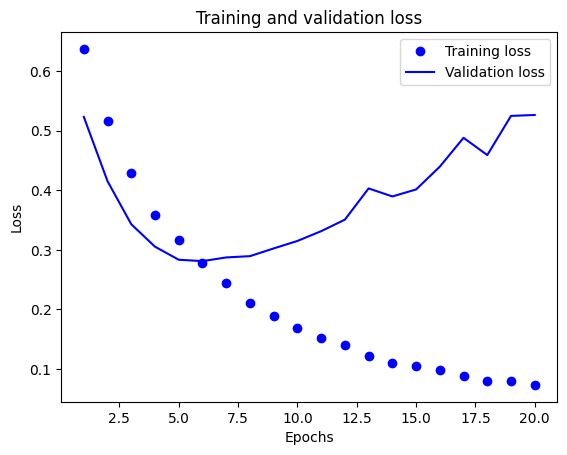

In [13]:
# Listing 3.9 Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [4]:
# §代碼清單 3-2
import numpy as np

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [5]:
# §4.3 原始模型 (method 1)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# §代碼清單 3-4
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


2023-09-15 09:24:49.659679: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-09-15 09:24:49.765614: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-15 09:24:49.765722: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-15 09:24:49.765849: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (VMDebianVIVO): /proc/driver/nvidia/version does not exist
2023-09-15 09:24:49.768078: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild Tens

In [6]:
# §4.3 原始模型  (method 1)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

2023-09-15 09:25:13.581843: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 600000000 exceeds 10% of free system memory.
2023-09-15 09:25:17.959578: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-09-15 09:25:18.003377: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1992000000 Hz


Epoch 1/20
30/30 [==============================] - 10s 237ms/step - loss: 0.4895 - accuracy: 0.8049 - val_loss: 0.3797 - val_accuracy: 0.8750
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3066 - accuracy: 0.9091 - val_loss: 0.3147 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2405 - accuracy: 0.9258 - val_loss: 0.2986 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1973 - accuracy: 0.9377 - val_loss: 0.2789 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1671 - accuracy: 0.9491 - val_loss: 0.2777 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1443 - accuracy: 0.9581 - val_loss: 0.2848 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1255 - accuracy: 0.9639 - val_loss: 0.2824 - val_accuracy: 0.8869
Epoch 8/20


2023-09-15 09:25:21.505786: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.
2023-09-15 09:25:21.519588: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.
2023-09-15 09:25:21.699683: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.


 4/30 [===>..........................] - ETA: 2s - loss: 0.6808 - accuracy: 0.5319

2023-09-15 09:25:21.778004: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.


30/30 [==============================] - 12s 306ms/step - loss: 0.5789 - accuracy: 0.7014 - val_loss: 0.3949 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3415 - accuracy: 0.8980 - val_loss: 0.3320 - val_accuracy: 0.8769
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2586 - accuracy: 0.9208 - val_loss: 0.2924 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2044 - accuracy: 0.9372 - val_loss: 0.2919 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1786 - accuracy: 0.9457 - val_loss: 0.2727 - val_accuracy: 0.8917
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1500 - accuracy: 0.9574 - val_loss: 0.2801 - val_accuracy: 0.8894
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1305 - accuracy: 0.9647 - val_loss: 0.2779 - val_accuracy: 0.8891
Epoch 8/20
30/30 [====

/tmp/ipykernel_18225/385232448.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
/tmp/ipykernel_18225/385232448.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')


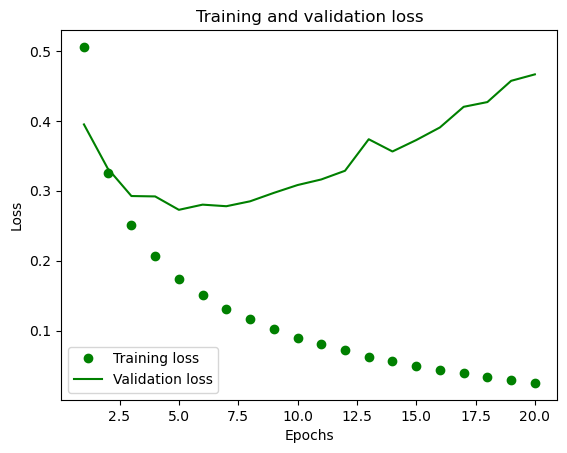

In [7]:
# §4.3 原始模型  (method 1)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [8]:
# §4.4 容量更小的模型 (method 2)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [9]:
# §4.4 容量更小的模型 (method 2)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# §代碼清單 3-8 
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 127ms/step - loss: 0.6390 - accuracy: 0.6913 - val_loss: 0.5106 - val_accuracy: 0.8489
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.4621 - accuracy: 0.8755 - val_loss: 0.4057 - val_accuracy: 0.8706
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3524 - accuracy: 0.9009 - val_loss: 0.3440 - val_accuracy: 0.8823
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2857 - accuracy: 0.9201 - val_loss: 0.3079 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2320 - accuracy: 0.9333 - val_loss: 0.2900 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2023 - accuracy: 0.9428 - val_loss: 0.2804 - val_accuracy: 0.8891
Epoch 7/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1757 - accuracy: 0.9500 - val_loss: 0.2726 - val_accuracy: 0.8908
Epoch 8/20
3

/tmp/ipykernel_18225/619948473.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
/tmp/ipykernel_18225/619948473.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')


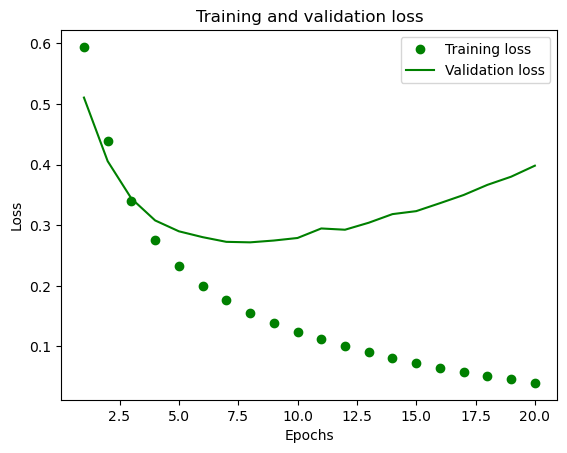

In [10]:
# §4.4 容量更小的模型 (method 2)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [40]:
# §4.4 容量更大的模型 (method 3)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [41]:
# §4.4 容量更大的模型 (method 3)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


2023-09-13 16:02:43.840334: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
30/30 [==============================] - 9s 303ms/step - loss: 0.6893 - accuracy: 0.6675 - val_loss: 0.3082 - val_accuracy: 0.8851
Epoch 2/20
30/30 [==============================] - 9s 287ms/step - loss: 0.2369 - accuracy: 0.9127 - val_loss: 0.2979 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 8s 276ms/step - loss: 0.1484 - accuracy: 0.9463 - val_loss: 0.3476 - val_accuracy: 0.8736
Epoch 4/20
30/30 [==============================] - 8s 279ms/step - loss: 0.0706 - accuracy: 0.9749 - val_loss: 0.3902 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 8s 278ms/step - loss: 0.0476 - accuracy: 0.9905 - val_loss: 0.3359 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 8s 279ms/step - loss: 0.0064 - accuracy: 0.9999 - val_loss: 0.5098 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 8s 278ms/step - loss: 6.5482e-04 - accuracy: 1.0000 - val_loss: 0.6262 - val_accuracy: 0.8852
Ep

/tmp/ipykernel_16742/870724659.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
/tmp/ipykernel_16742/870724659.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')


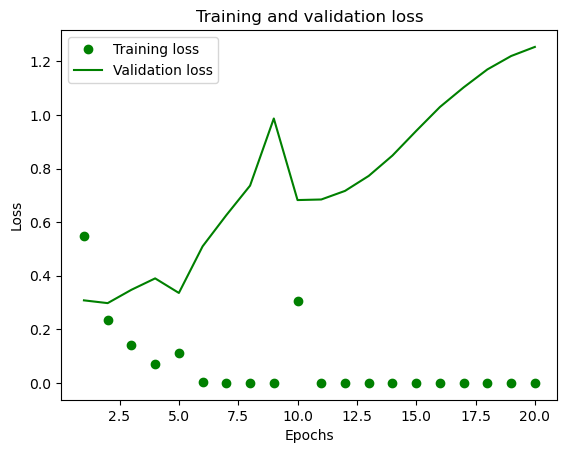

In [42]:
# §4.4 容量更大的模型 (method 3)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
# §4.6 向模型添加L2權重正則化

from keras import regularizers

model = models.Sequential()

# §4.7 Keras中不同的權重正則化項
# kernel_regularizer=regularizers.l2(0.01)
# kernel_regularizer=regularizers.l1(00.01)
# kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)

model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),
                      activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# §代碼清單 3-4
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [44]:
# §代碼清單 3-8 (§4.6 L2)
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 91ms/step - loss: 0.8015 - accuracy: 0.6493 - val_loss: 0.6330 - val_accuracy: 0.7836
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5459 - accuracy: 0.8876 - val_loss: 0.4983 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4415 - accuracy: 0.9142 - val_loss: 0.4546 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3808 - accuracy: 0.9279 - val_loss: 0.4411 - val_accuracy: 0.8808
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3444 - accuracy: 0.9347 - val_loss: 0.4221 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3182 - accuracy: 0.9422 - val_loss: 0.4304 - val_accuracy: 0.8778
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3005 - accuracy: 0.9481 - val_loss: 0.4135 - val_accuracy: 0.8829
Epoch 8/20
30

/tmp/ipykernel_16742/2345061308.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
/tmp/ipykernel_16742/2345061308.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')


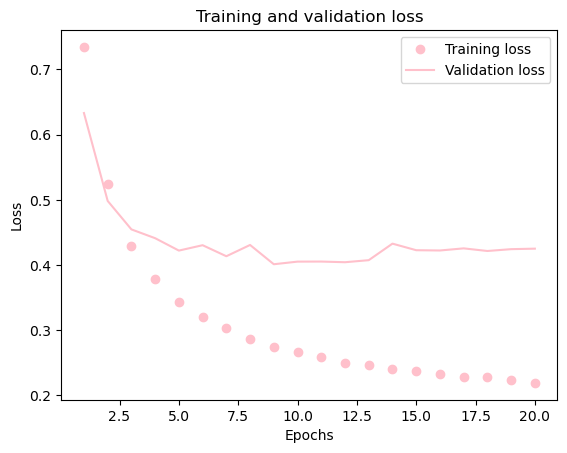

In [45]:
# §代碼清單 3-9 (§4.6 L2)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [46]:
# §代碼清單 4-8 向IMDB網路中添加dropout

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
# §代碼清單 4-8 向IMDB網路中添加dropout -- CONTINUE 01 --
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


C:\Users\linea\AppData\Local\Temp\ipykernel_3212\2134820698.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
C:\Users\linea\AppData\Local\Temp\ipykernel_3212\2134820698.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')


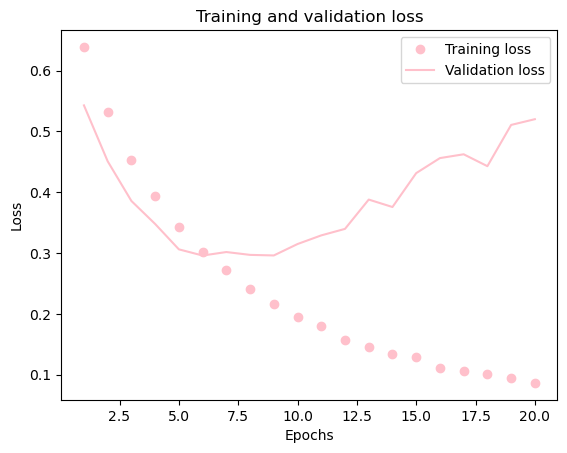

In [13]:
# §代碼清單 4-8 向IMDB網路中添加dropout -- CONTINUE 02 --
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
